In [59]:
%load_ext dotenv
%dotenv


The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [2]:
import os
from dotenv import load_dotenv

load_dotenv() 
ROOT = os.getenv("ROOT")
DATA = os.getenv("DATA")
SCRIPTS = os.getenv("SCRIPTS")

'/home/callebalik/clinical_NLP_SE/notebooks'

In [44]:
import pandas as pd
from pandas import DataFrame
from pathlib import Path


def conll2003_to_df(file_path) -> DataFrame:
    names = ["TOKEN", "POS", "CHUNK", "NE"]
    df = pd.read_csv(file_path, sep=" ", names=names)
    df.dropna(how="all", inplace=True)  # remove empty lines
    return df


def get_cleaned_label(label: str):
    if "-" in label:
        return label.split("-")[1]
    else:
        return label


def create_target_vector(df: DataFrame):
    return [get_cleaned_label(label) for label in df["NE"]]


def create_total_target_vector(dir_path):
    target_vector = []

    pathlist = Path(dir_path).glob("**/*.conll")

    for path in pathlist:
        target_vector.extend(create_target_vector(conll2003_to_df(path)))
    return target_vector


In [71]:
corpus = Path(f"{DATA}/interim/corpus/a1")
# Create Dataframe
df = conll2003_to_df(corpus / "1.conll")
create_total_target_vector(corpus)

['O',
 'O',
 'DIS',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'NEG',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'NEG',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'FND',
 'O',
 'O',
 'O',
 'FND',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'NEG',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'FND',
 'FND',
 'FND',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'FND',
 'O',
 'O',
 'FND',
 'FND',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'NEG',
 'FND',
 'O',
 'NEG',
 'FND',
 'FND',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'FND',
 'FND',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'FND',
 'O',
 'FND',
 'FND',
 '

In [45]:
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(annotation_set_1, annotation_set_2, classes:list): 
    """ Classes reorders the matrix """ 
    y_true = create_total_target_vector(annotation_set_1)
    y_pred = create_total_target_vector(annotation_set_2)

    return confusion_matrix(y_true, y_pred, labels=classes)

def get_dataset_labels(annotation_set):
    return sorted(set(create_total_target_vector(annotation_set)))

<AxesSubplot:>

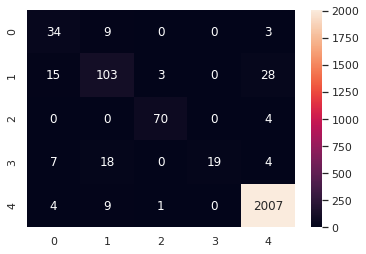

In [46]:
import seaborn as sns 
import numpy as np
a1 = Path(f"{DATA}/interim/corpus/a1")
a2 = Path(f"{DATA}/interim/corpus/a2")
classes = ["SYM","FND","NEG","DIS","O"]
cm = generate_confusion_matrix(a1, a2, classes)
sns.heatmap(cm, annot=True, fmt="")
# sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%")

In [57]:


from matplotlib import pyplot
import numpy

def plot_confusion_matrix(a1, a2, classes=get_dataset_labels(a1), normalize=False, cmap=pyplot.cm.Blues, xlabel="Predicted Label", ylabel="True Label", title="Multi-class Confusion Matrix"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = generate_confusion_matrix(a1, a2, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]

    fig, ax = pyplot.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=numpy.arange(cm.shape[1]),
           yticks=numpy.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel=ylabel,
           xlabel=xlabel)

    # Rotate the tick labels and set their alignment.
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm, ax, pyplot

(array([[7.39130435e-01, 1.95652174e-01, 0.00000000e+00, 0.00000000e+00,
         6.52173913e-02],
        [1.00671141e-01, 6.91275168e-01, 2.01342282e-02, 0.00000000e+00,
         1.87919463e-01],
        [0.00000000e+00, 0.00000000e+00, 9.45945946e-01, 0.00000000e+00,
         5.40540541e-02],
        [1.45833333e-01, 3.75000000e-01, 0.00000000e+00, 3.95833333e-01,
         8.33333333e-02],
        [1.97921821e-03, 4.45324097e-03, 4.94804552e-04, 0.00000000e+00,
         9.93072736e-01]]),
 <AxesSubplot:title={'center':'Multi-class Confusion Matrix'}, xlabel='annotator2', ylabel='annotator1'>,
 <module 'matplotlib.pyplot' from '/home/callebalik/.virtualenvs/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>)

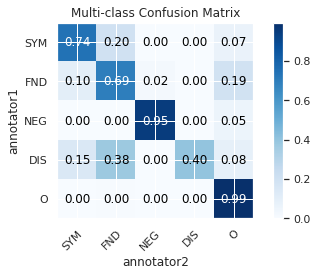

In [58]:
# import matplotlib.colors as mcolors
# hue = np.random.randint(0,4, size=200)
# u = np.unique(hue)
# cmap = mcolors.LinearSegmentedColormap.from_list("", ["indigo","gold"],gamma=0.5,N=len(u))
# cmap="YlGnBu"

a1 = Path(f"{DATA}/interim/corpus/a1")
a2 = Path(f"{DATA}/interim/corpus/a2")
classes = ["SYM","FND","NEG","DIS","O"]

plot_confusion_matrix(a1, a2, classes=classes, normalize=True, xlabel="annotator2", ylabel="annotator1")

In [38]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

a1 = Path(f"{DATA}/interim/corpus/a1")
a2 = Path(f"{DATA}/interim/corpus/a2")

a1 = create_total_target_vector(a1)
a2 = create_total_target_vector(a2)
classes = ["SYM","FND","NEG","DIS","O"]

print(f"Cohen Kappa {cohen_kappa_score(a1, a2)}")
cr = classification_report(a1,a2, labels=classes, output_dict=True)
cr = pd.DataFrame.from_dict(cr)

print(classification_report(a1,a2, labels=classes)) # IF not as dict, it can be neatly printed

Cohen Kappa 0.8113674381578877
              precision    recall  f1-score   support

         SYM       0.57      0.74      0.64        46
         FND       0.74      0.69      0.72       149
         NEG       0.95      0.95      0.95        74
         DIS       1.00      0.40      0.57        48
           O       0.98      0.99      0.99      2021

    accuracy                           0.96      2338
   macro avg       0.85      0.75      0.77      2338
weighted avg       0.96      0.96      0.95      2338



In [195]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(a1, a2), 2)}")
print(f"Precision: {round(precision_score(a1, a2, average="micro"), 2)}")
# print(f"Recall: {round(recall_score(a1, a2), 2)}")
# print(f"F1_score: {round(f1_score(a1, a2), 2)}")

SyntaxError: invalid syntax (420265774.py, line 4)